In [ ]:
import time

import numpy as np
import pandas as pd
from icecream import ic
from matplotlib import pyplot as plt
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    RepeatedKFold,
    train_test_split,
)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# DATA 607 - Machine Learning

## Class 7 &mdash; 2025.05.14

### Boosting

(-0.5, 1.5)

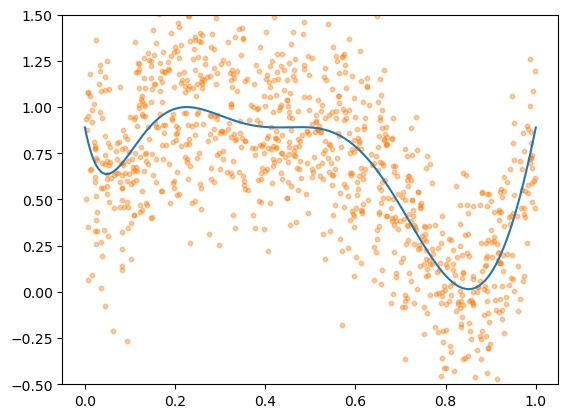

In [3]:
def f(x):
    c = np.array(
        [
            8.89790000e-01,
            -1.24853715e01,
            2.00598302e02,
            -1.20027425e03,
            3.59728524e03,
            -5.91118526e03,
            5.35786134e03,
            -2.49811475e03,
            4.66314753e02,
        ]
    )
    return sum(ci * x**i for i, ci in enumerate(c))


n = 1000
scale = 0.3
n_estimators = 10000

rng = np.random.default_rng()
x_train = rng.uniform(size=n)
e_train = rng.normal(scale=scale, size=n)
y_train = f(x_train) + e_train

x_test = np.linspace(0, 1, 1000)
X_test = x_test.reshape(-1, 1)
e_test = rng.normal(scale=scale, size=n)
y_test = f(x_test) + e_train

plt.plot(x_test, f(x_test))
plt.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
plt.ylim(-0.5, 1.5)

$$
L(F) = \frac1n\sum_{i<n} (y_i - F(x_i))^2
$$

$$
\frac{\partial L}{\partial F} = \frac2n\sum_{i<n}(y_i - F(x_i))
$$

If $h(x)$ is some function approximating the residuals:
$$
h(x_i) \approx y_i - F(x_i)
$$

L(F + h)

In [16]:
df = pd.read_csv("~\\.cache\\kagglehub\\datasets\\zalando-research\\fashionmnist\\versions\\4\\fashion-mnist_train.csv")

In [18]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y = df["label"]
X = df.iloc[:, 1:]

In [19]:
oob_scores = []
times = []
for max_samples in [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
    start = time.time()
    model = RandomForestClassifier(max_samples=max_samples, oob_score=True)
    model.fit(X, y)
    stop = time.time()
    t = stop - start
    times.append(t)
    oob_scores.append(model.oob_score_)
    ic(max_samples, f"{t:.1f}", f"{model.oob_score_:.2f}")

ic| max_samples: 1000, f": '20.9', f": '0.83'
ic| max_samples: 2000, f": '23.7', f": '0.84'
ic| max_samples: 3000, f": '25.9', f": '0.85'
ic| max_samples: 4000, f": '28.6', f": '0.86'
ic| max_samples: 5000, f": '30.2', f": '0.86'
ic| max_samples: 6000, f": '32.7', f": '0.86'
ic| max_samples: 7000, f": '36.3', f": '0.86'
ic| max_samples: 8000, f": '38.4', f": '0.86'
ic| max_samples: 9000, f": '40.7', f": '0.87'
ic| max_samples: 10000, f": '43.7', f": '0.87'


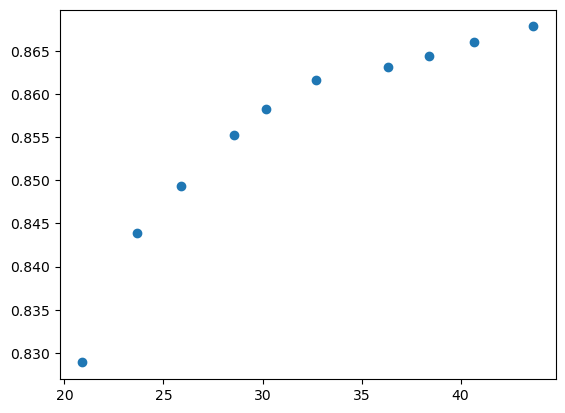

In [20]:
plt.scatter(times, oob_scores)

In [21]:
param_grid = {
    "n_estimators": [100, 200],
    "max_features": ["log2", "sqrt"],
    "max_samples": [15000, 17000, 19000, 21000, 23000, 25000, 27000, 29000],
}

search = GridSearchCV(
    RandomForestClassifier(n_jobs=-1), param_grid, cv=2, scoring="accuracy"
)
search.fit(X, y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['log2', 'sqrt'],
                         'max_samples': [15000, 17000, 19000, 21000, 23000,
                                         25000, 27000, 29000],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [22]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,2.381204,0.408566,0.435044,0.094065,log2,15000,100,"{'max_features': 'log2', 'max_samples': 15000,...",0.865933,0.864433,0.865183,0.000750,31
1,2.455036,0.022689,0.526360,0.034996,log2,15000,200,"{'max_features': 'log2', 'max_samples': 15000,...",0.867333,0.865100,0.866217,0.001117,30
2,1.587360,0.004212,0.353637,0.033502,log2,17000,100,"{'max_features': 'log2', 'max_samples': 17000,...",0.866800,0.863033,0.864917,0.001883,32
3,2.611582,0.005146,0.512210,0.004253,log2,17000,200,"{'max_features': 'log2', 'max_samples': 17000,...",0.868367,0.865967,0.867167,0.001200,27
4,1.630835,0.023512,0.353533,0.006049,log2,19000,100,"{'max_features': 'log2', 'max_samples': 19000,...",0.866600,0.866933,0.866767,0.000167,29
5,2.745103,0.020919,0.509498,0.045740,log2,19000,200,"{'max_features': 'log2', 'max_samples': 19000,...",0.868400,0.868367,0.868383,0.000017,25
6,1.711626,0.007592,0.335147,0.003523,log2,21000,100,"{'max_features': 'log2', 'max_samples': 21000,...",0.868567,0.866333,0.867450,0.001117,26
7,2.968843,0.018483,0.516706,0.034324,log2,21000,200,"{'max_features': 'log2', 'max_samples': 21000,...",0.870300,0.868933,0.869617,0.000683,19
8,1.815560,0.003575,0.343661,0.029135,log2,23000,100,"{'max_features': 'log2', 'max_samples': 23000,...",0.867033,0.867200,0.867117,0.000083,28
9,3.067712,0.000753,0.486247,0.008532,log2,23000,200,"{'max_features': 'log2', 'max_samples': 23000,...",0.870733,0.869933,0.870333,0.000400,17


In [23]:
results = pd.DataFrame(search.cv_results_)

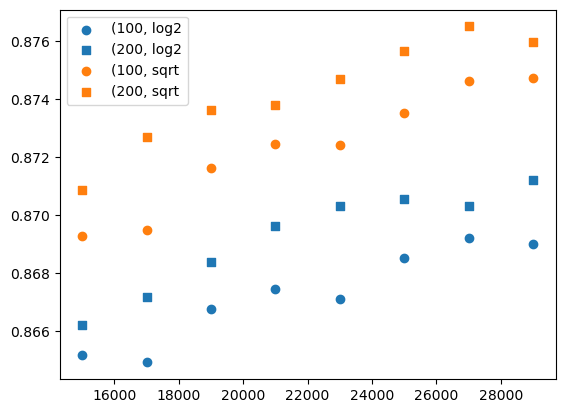

In [24]:
for (max_features, n_estimators), group in results.groupby(
    ["param_max_features", "param_n_estimators"]
):
    plt.scatter(
        group["param_max_samples"],
        group["mean_test_score"],
        marker="o" if n_estimators == 100 else "s",
        c="C0" if max_features == "log2" else "C1",
        label=f"({n_estimators}, {max_features}",
    )
plt.legend()
plt.show()

In [25]:
param_grid = {
    "n_estimators": [1000],
}

search = GridSearchCV(
    RandomForestClassifier(max_samples=27_000, max_features="sqrt", n_jobs=-1),
    param_grid,
    cv=2,
    scoring="accuracy",
)
search.fit(X, y)
results = pd.DataFrame(search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,41.669826,0.220792,1.836661,0.003024,1000,{'n_estimators': 1000},0.878233,0.877433,0.877833,0.0004,1


$$
\begin{aligned}
\tilde{r}_i^2 &= (y_i - \tilde{f}(x_i))^2\\
&= (y_i - (f(x_i) +\epsilon r(x_i)))^2\\
&= (r_i - \epsilon(r_i + \eta_i))^2\\
&= ((1 - \epsilon)r_i - \epsilon\eta_i)^2
\end{aligned}
$$

$$
\begin{aligned}
\frac{\tilde{r}_i^2}{r_i^2} &= \left(1 - \epsilon\left(1+\frac{\eta_i}{r_i}\right)\right)^2
\end{aligned}
$$

Suppose
$$
\left|\frac{\eta_i}{r_i}\right| < 1 - \delta.
$$

Then
$$
1 + \frac{\eta_i}{r_i} > \delta.
$$

Therefore,
$$
1 - \epsilon\left(1+\frac{\eta_i}{r_i}\right) < 1 - \epsilon\delta
$$
and
$$
\frac{\tilde{r}_i^2}{r_i^2} < (1 - \epsilon\delta)^2.
$$
In particular,
$$
\tilde{r}_i^2 < r_i^2
$$
and we've reduced the training error.

Fit a ***residual model*** $r(x)$ to $(x_i, r_i)$, so that
$$
r(x_i)\approx r_i.
$$
Suppose that 

$$
\begin{aligned}
\tilde{r}_i^2 &= (y_i - \tilde{f}(x_i))^2\\
&= (y_i - (f(x_i) + r(x_i)))^2\\
&= \left(r_i - r(x_i)\right)^2
\end{aligned}
$$

$$
\begin{aligned}
\frac{\tilde{r}_i^2}{r_i^2} &= \left(1 - \left(1+\frac{\eta_i}{r_i}\right)\right)^2
\end{aligned}
$$

Suppose
$$
\left|\frac{\eta_i}{r_i}\right| < 1.
$$

Then
$$
1 + \frac{\eta_i}{r_i} > 0.
$$

Therefore,
$$
1 - \left(1+\frac{\eta_i}{r_i}\right) < 1
$$
and
$$
\frac{\tilde{r}_i^2}{r_i^2} < 1.
$$
In particular,
$$
\tilde{r}_i^2 < r_i^2
$$
and we've reduced the training error.

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv("data/auto_preprocessed.csv")
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [27]:
cross_val_score(
    GradientBoostingRegressor(n_estimators=700, learning_rate=0.02, max_features=2),
    X,
    y,
    scoring="neg_mean_squared_error",
).mean()

-7.519525157466345

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

$$
L(\hat{y}_0,\ldots,\hat{y}_{n-1}) = \frac1n\sum_i(y_i - \hat{y}_i)^2
$$

For small increments $h_0,\ldots,h_{n-1}$, we have the **first-order approximation**
$$
\begin{aligned}
L(\hat{y}_0 + h_0,\ldots, \hat{y}_{n-1} + h_{n-1}) - L(\hat{y})
&\approx \sum_{i < n}\frac{\partial L}{\partial \hat{y}_i}h_i\\
&= -\frac{2}{n}\sum_{i < n}(y_i - \hat{y_i})h.
\end{aligned}
$$

If $\varepsilon$ is a sufficiently small positive number, then
$$
h_i = \varepsilon (y_i -\hat{y}_i)
$$
is a small increment and
$$
L(\hat{y}_0 + h_0,\ldots, \hat{y}_{n-1} + h_{n-1}) - L(\hat{y}) \approx -\frac{2\epsilon}{n}\sum_{i < n}(y_i - \hat{y_i})^2 < 0.
$$
Thus,
$$
L(\hat{y}_0 + h_0,\ldots, \hat{y}_{n-1} + h_{n-1}) < L(\hat{y}).
$$

In [29]:
y_pred = np.zeros_like(y)
r = y.copy()
for i in range(30):
    model = DecisionTreeRegressor(max_depth=3)
    model.fit(X, r)
    s = model.predict(X)
    print(np.mean(np.abs((s - r) / r) < 1))
    y_pred += s if i == 0 else 0.3 * s
    print(mean_squared_error(y, y_pred))
    r -= s

1.0
10.432337988446655
0.6025641025641025
8.657564059408111
0.5333333333333333
8.282205211333219
0.5435897435897435
7.932995345221078
0.5435897435897435
7.504059866981431
0.5435897435897435
7.35510890650849
0.5333333333333333
7.2306625184390985
0.5487179487179488
7.065296008334796
0.5205128205128206
6.881755902718858
0.5461538461538461
6.713301499976996
0.5230769230769231
6.695194018197009
0.49743589743589745
6.629563090588508
0.5205128205128206
6.577122320437714
0.5538461538461539
6.421397941262735
0.5384615384615384
6.227279981572944
0.5256410256410257
6.083838752969377
0.5153846153846153
6.100285933143114
0.5282051282051282
6.0049851774778595
0.5025641025641026
5.992204284893993
0.5256410256410257
5.8810071654390965
0.5282051282051282
5.817922798752008
0.5102564102564102
5.778663545240201
0.5205128205128206
5.754471737240164
0.517948717948718
5.759138948188841
0.5153846153846153
5.770281425932646
0.5153846153846153
5.742462661542682
0.558974358974359
5.666438135050434
0.515384615384

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv("data/auto_preprocessed.csv")
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

model = DecisionTreeRegressor(min_samples_leaf=20, max_depth=5)
model.fit(X, y)
r = y - model.predict(X)
r.mean()

4.190380236533924e-16

In [33]:
model2 = DecisionTreeRegressor(max_depth=1)
model2.fit(X, r)
print(mean_squared_error(y, model.predict(X) + model1.predict(X) + model2.predict(X)))
r2 = r - model2.predict(X)

NameError: name 'model1' is not defined

In [35]:
import mlflow

In [36]:
mlflow.login()

2025/03/17 10:59:29 INFO mlflow.utils.credentials: No valid Databricks credentials found, please enter your credentials...
2025/03/17 11:00:29 ERROR mlflow.utils.credentials: Invalid host: {host}, host must begin with https://, please retry.


MlflowException: `mlflow.login()` failed with error: Databricks SDK is not installed. To use `mlflow.login()`, please install databricks-sdk by `pip install databricks-sdk`.

In [37]:
mlflow.set_tracking_uri("databricks")

In [38]:
mlflow.create_experiment(
    "/Users/fmgreenberg@gmail.com/check-databricks-connection",
    artifact_location="dbfs:/Volumes/test/mlflow/check-databricks-connection",
)
mlflow.set_experiment("/Users/fmgreenberg@gmail.com/check-databricks-connection")

with mlflow.start_run():
    mlflow.log_metric("foo", 1)
    mlflow.log_metric("bar", 2)

MlflowException: Got malformed Databricks CLI profile 'None'. Please make sure the Databricks CLI is properly configured as described at https://github.com/databricks/databricks-cli.

In [40]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

df = pd.read_csv("data/auto_preprocessed.csv")

y = df.iloc[:, 0]
X = df.iloc[:, 1:]

f = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), Ridge(alpha=0.085))
cross_val_score(f, X, y, scoring="neg_mean_squared_error", cv=RepeatedKFold()).mean()

-7.5695216041988544

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
f.fit(X_train, y_train)

rng = np.random.default_rng(42)
e_train = rng.normal(scale=2.7, size=len(X_train))
e_test = rng.normal(scale=2.7, size=len(X_test))

y_train = pd.Series(f.predict(X_train) + e_train, index=X_train.index, name="y_train")
y_test = pd.Series(f.predict(X_test) + e_test, index=X_test.index, name="y_test")

In [45]:
n_estimators = 100
rf = RandomForestRegressor(n_estimators=n_estimators)
rf.fit(X_train, y_train)
mean_squared_error(y_test, rf.predict(X_test))

9.6349758578544

In [46]:
fs = f.predict(X_test)

In [48]:
np.zeros((n_estimators, len(X_test)))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
fhats = np.zeros((n_estimators, len(X_test)))
for i, fhat in enumerate(rf.estimators_):
    fhats[i] = fhat.predict(X_test.to_numpy())

In [52]:
rf.predict(X_test)

array([30.79536348, 17.91382808, 33.80459025, 15.1713144 , 24.47965956,
       15.4367022 , 12.57537314, 14.46892447, 26.52881777, 27.60209093,
       15.49730704, 27.57372405, 14.67043235, 26.8395281 , 33.02010523,
       16.00381488, 11.7123539 , 20.24334418, 25.46095932, 23.50003006,
       13.01368117, 17.38220835, 21.34827264, 30.20751989, 24.95599329,
       14.30517955, 20.96387199, 24.86245969, 27.76635109, 14.11846579,
       30.25900988, 31.79986856, 26.89555618, 13.58967433, 25.93459604,
       26.00203818, 22.83746374, 25.7673167 , 17.32872104, 25.60774273,
       26.21224411, 17.85005115, 32.0130775 , 12.02408158, 26.33375805,
       16.70348019, 18.81847733, 16.90821909, 28.32847262, 20.56071719,
       31.9089558 , 13.90155216, 18.40535252, 20.59326675, 14.1027604 ,
       23.73270386, 32.06003318, 28.69175846, 34.19933201, 30.78547938,
       20.19028918, 24.02520643, 21.13267947, 15.04243724, 15.99777367,
       15.09530979, 20.08224942, 17.49647763, 20.1905081 , 18.92

In [54]:
np.sqrt(7.5)

2.7386127875258306

In [61]:
np.mean(fhats - fs, axis=0)

array([ 2.09145695, -2.37134284, -2.72473241, -0.22425587,  4.12030645,
        0.29216841, -0.29168998, -0.86224668, -0.4245461 ,  0.91567594,
        1.63021778, -1.71430016,  1.37173445,  1.64974797, -1.50070257,
       -0.08588381, -0.17715188,  0.83801264, -1.28066894, -1.64364602,
       -0.84089336,  0.03132721,  1.48669684, -1.34883517,  0.84175868,
       -0.04075639,  0.93987476, -3.76171672, -0.49124091, -0.91944985,
       -1.43492208, -1.77997395, -0.06224945, -0.11201955, -0.58426778,
       -1.72556646, -0.13886586,  0.05755608,  0.81032207, -0.93400178,
        3.75239901,  0.40915161, -0.1245057 ,  0.91880371, -0.206823  ,
        1.05818493,  1.69029949, -1.38133126,  0.71703   , -1.87574398,
       -1.86438541,  0.85875925,  0.45432487,  0.02016702, -1.45449471,
       -0.02332473, -2.39191889, -1.98336141,  0.89634059, -1.43590107,
       -1.07129913,  0.74218863,  0.38168939,  0.64070456,  0.19936736,
       -0.01613058, -1.56681874,  0.92069954, -1.13811839,  0.70

In [63]:
y_test - (fhats.mean(axis=0) + np.mean(fs - fhats, axis=0) + e_test)

19     2.131628e-14
200    7.105427e-15
370   -1.421085e-14
211   -1.776357e-15
119    3.552714e-15
           ...     
279   -1.065814e-14
320    1.421085e-14
221    1.065814e-14
6      1.065814e-14
203   -1.421085e-14
Name: y_test, Length: 78, dtype: float64

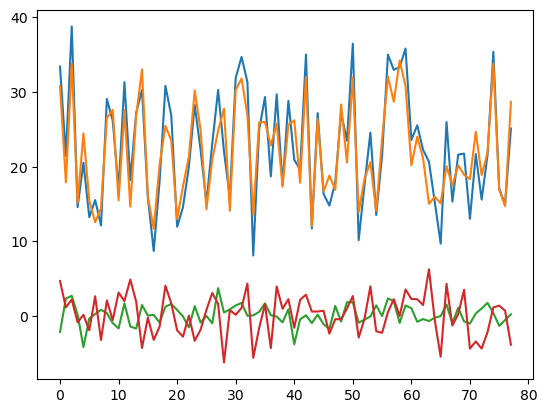

In [64]:
plt.plot(y_test.to_numpy())
plt.plot(fhats.mean(axis=0))
plt.plot(np.mean(fs - fhats, axis=0))
plt.plot(e_test)

In [65]:
np.mean(e_test * np.mean(fs - fhats, axis=0))

0.10949933612059534

In [66]:
def f(x):
    return (
        -0.002205 * x + 0.0462 * x**2 - 0.338 * x**3 + 1.13 * x**4 - 1.75 * x**5 + x**6
    )

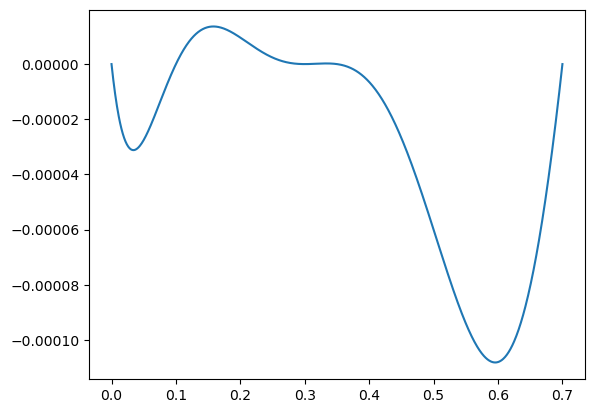

In [67]:
x = np.linspace(0, 0.7, 1000)
plt.plot(x, (1 - x) ** 2 * f(x))

In [68]:
c = np.array([0, -0.002205, 0.0462, -0.338, +1.13, -1.75, 1, 0, 0])

(-0.5, 1.5)

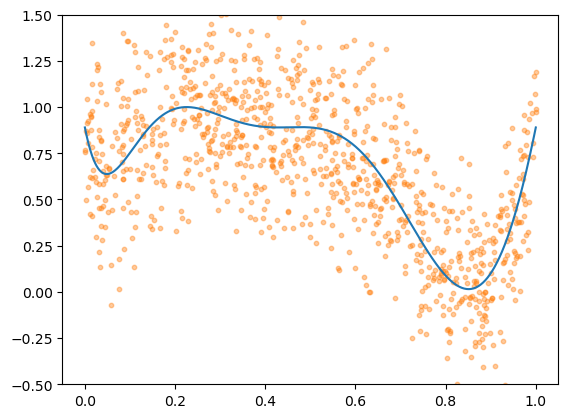

In [69]:
def f(x):
    c = np.array(
        [
            8.89790000e-01,
            -1.24853715e01,
            2.00598302e02,
            -1.20027425e03,
            3.59728524e03,
            -5.91118526e03,
            5.35786134e03,
            -2.49811475e03,
            4.66314753e02,
        ]
    )
    return sum(ci * x**i for i, ci in enumerate(c))


n = 1000
sigma = 0.1
n_estimators = 10000

rng = np.random.default_rng()
x_train = rng.uniform(size=n)
e_train = rng.normal(scale=0.3, size=n)
y_train = f(x_train) + e_train

x_test = np.linspace(0, 1, 1000)
X_test = x_test.reshape(-1, 1)
e_test = rng.normal(scale=0.3, size=n)
y_test = f(x_test) + e_train

plt.plot(x_test, f(x_test))
plt.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
plt.ylim(-0.5, 1.5)

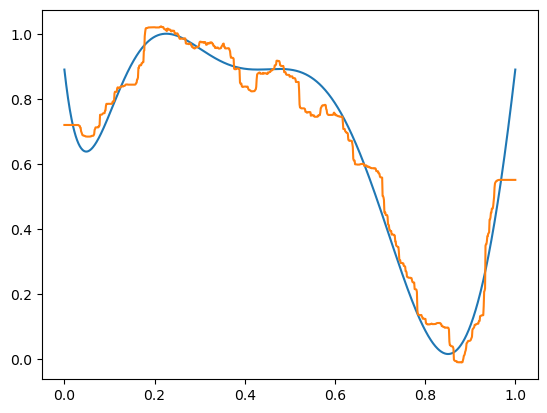

In [70]:
model = GridSearchCV(
    RandomForestRegressor(n_estimators=2000),
    param_grid={"min_samples_leaf": np.arange(30, 45)},
    scoring="neg_mean_squared_error",
)
model.fit(x_train.reshape(-1, 1), y_train)
plt.plot(x_test, f(x_test))
plt.plot(x_test, model.predict(x_test.reshape(-1, 1)))

ic| model.best_params_: {'min_samples_leaf': 30}


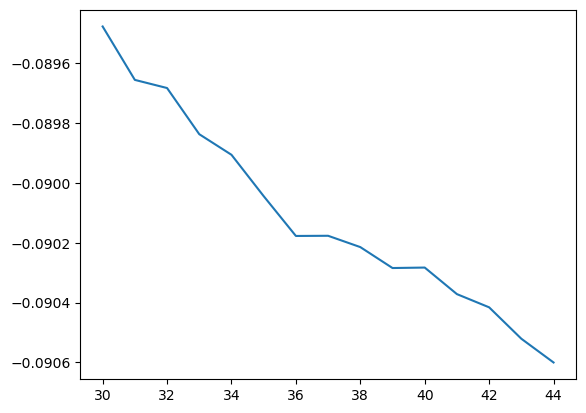

In [71]:
ic(model.best_params_)
plt.plot(
    model.cv_results_["param_min_samples_leaf"],
    model.cv_results_["mean_test_score"],
)

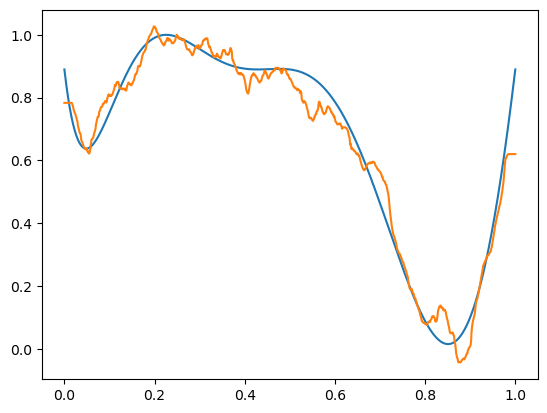

In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

model = GridSearchCV(
    BaggingRegressor(KNeighborsRegressor(), n_estimators=100),
    param_grid={"estimator__n_neighbors": np.arange(30, 60)},
    scoring="neg_mean_squared_error",
    cv=RepeatedKFold(),
)
model.fit(x_train.reshape(-1, 1), y_train)
plt.plot(x_test, f(x_test))
plt.plot(x_test, model.predict(x_test.reshape(-1, 1)))

In [73]:
model.best_params_

{'estimator__n_neighbors': 40}

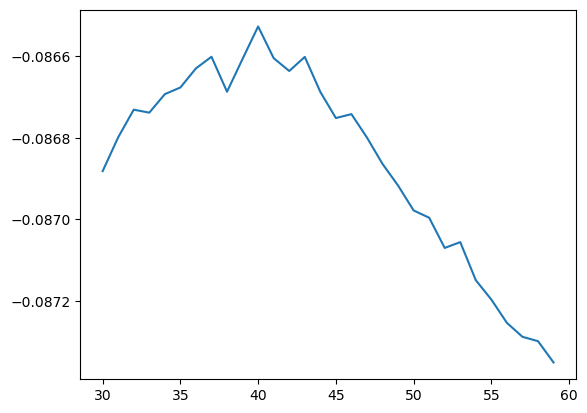

In [74]:
plt.plot(
    model.cv_results_["param_estimator__n_neighbors"],
    model.cv_results_["mean_test_score"],
)

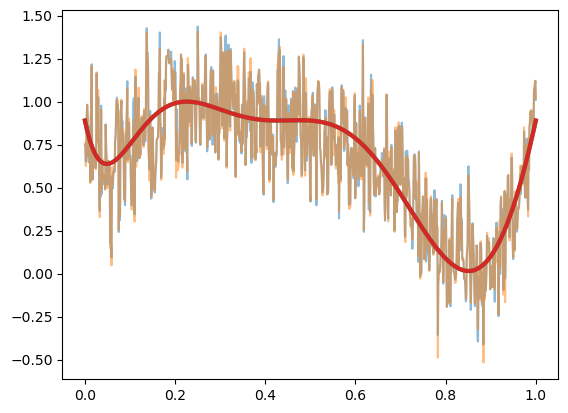

In [75]:
model = BaggingRegressor(KNeighborsRegressor(n_neighbors=1), n_estimators=100)
model.fit(x_train.reshape(-1, 1), y_train)
plt.plot(x_test, model.predict(x_test.reshape(-1, 1)), alpha=0.5)

model = RandomForestRegressor()
model.fit(x_train.reshape(-1, 1), y_train)
plt.plot(x_test, model.predict(x_test.reshape(-1, 1)), alpha=0.5)
plt.plot(x_test, f(x_test), lw=3)


plt.plot(x_test, f(x_test), lw=3)

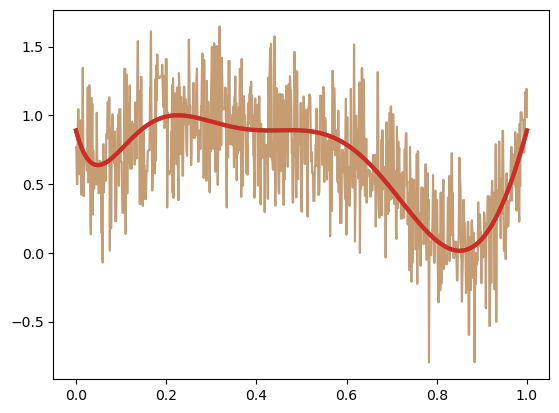

In [76]:
from sklearn.tree import DecisionTreeRegressor

model = KNeighborsRegressor(n_neighbors=1)
model.fit(x_train.reshape(-1, 1), y_train)
plt.plot(x_test, model.predict(x_test.reshape(-1, 1)), alpha=0.5)

model = DecisionTreeRegressor(min_samples_leaf=1)
model.fit(x_train.reshape(-1, 1), y_train)
plt.plot(x_test, model.predict(x_test.reshape(-1, 1)), alpha=0.5)
plt.plot(x_test, f(x_test), lw=3)


plt.plot(x_test, f(x_test), lw=3)

(-0.5, 1.5)

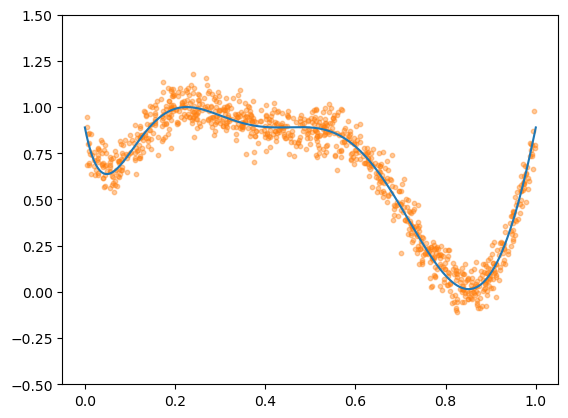

In [77]:
n = 1000
scale = 0.07
n_estimators = 10000

rng = np.random.default_rng()
x_train = rng.uniform(size=n)
e_train = rng.normal(scale=scale, size=n)
y_train = f(x_train) + e_train

x_test = np.linspace(0, 1, 1000)
X_test = x_test.reshape(-1, 1)
e_test = rng.normal(scale=scale, size=n)
y_test = f(x_test) + e_train

plt.plot(x_test, f(x_test))
plt.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
plt.ylim(-0.5, 1.5)

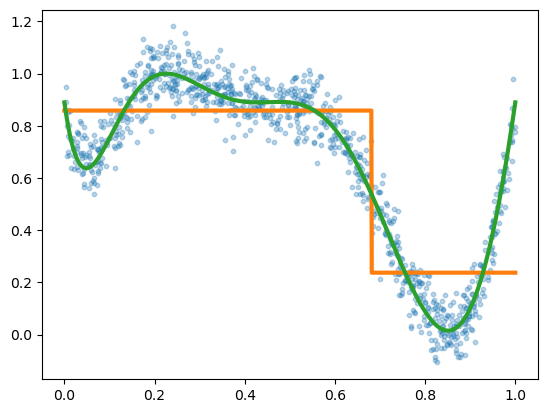

In [79]:
X_train = x_train.reshape(-1, 1)
X_test = x_test.reshape(-1, 1)

model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)
plt.scatter(x_train, y_train, s=10, c="C0", alpha=0.3)
plt.plot(x_test, model.predict(X_test), "C1", lw=3)
plt.plot(x_test, f(x_test), "C2", lw=3)

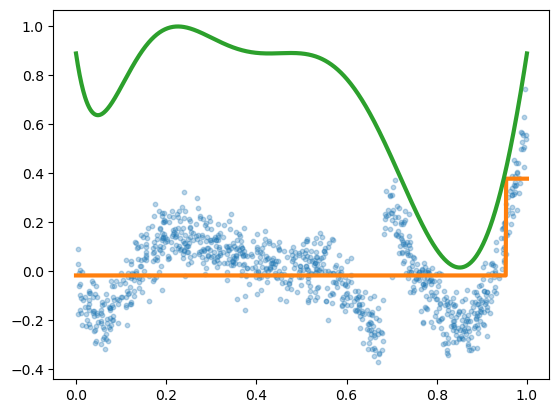

In [81]:
model1 = DecisionTreeRegressor(max_depth=1)
model1.fit(X_train, y_train - model.predict(X_train))


plt.scatter(x_train, y_train - model.predict(X_train), s=10, c="C0", alpha=0.3)
plt.plot(x_test, model1.predict(X_test), "C1", lw=3)
plt.plot(x_test, f(x_test), "C2", lw=3)

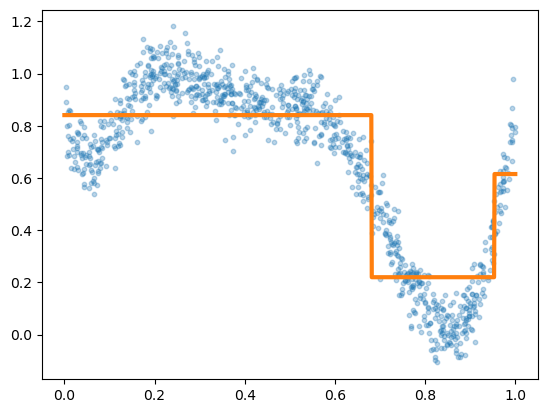

In [82]:
plt.scatter(x_train, y_train, s=10, c="C0", alpha=0.3)
plt.plot(x_test, model.predict(X_test) + model1.predict(X_test), "C1", lw=3)

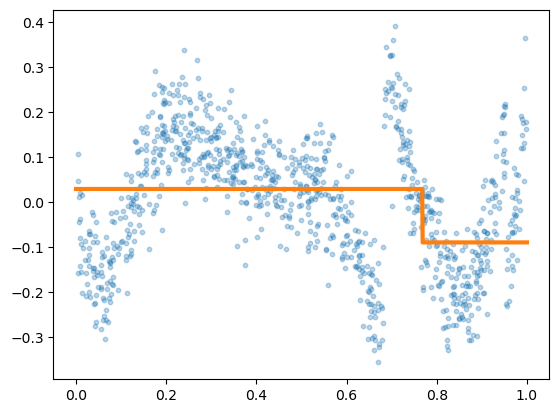

In [83]:
model2 = DecisionTreeRegressor(max_depth=1)
model2.fit(X_train, y_train - model.predict(X_train) - model1.predict(X_train))


plt.scatter(
    x_train,
    y_train - model.predict(X_train) - model1.predict(X_train),
    s=10,
    c="C0",
    alpha=0.3,
)
plt.plot(x_test, model2.predict(X_test), "C1", lw=3)

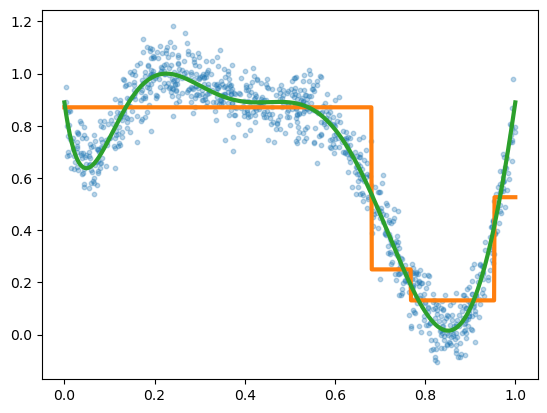

In [84]:
plt.scatter(x_train, y_train, s=10, c="C0", alpha=0.3)
plt.plot(
    x_test,
    model.predict(X_test) + model1.predict(X_test) + model2.predict(X_test),
    "C1",
    lw=3,
)
plt.plot(x_test, f(x_test), "C2", lw=3)

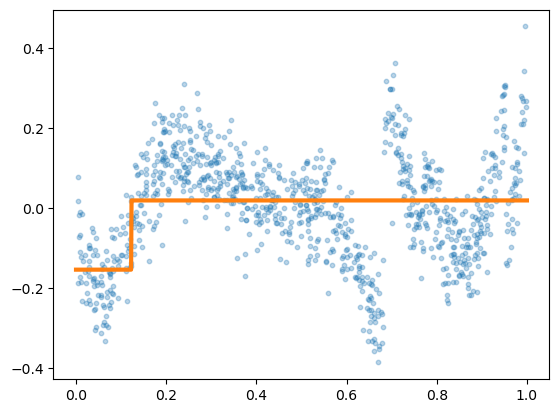

In [85]:
model3 = DecisionTreeRegressor(max_depth=1)
model3.fit(
    X_train,
    y_train
    - model.predict(X_train)
    - model1.predict(X_train)
    - model2.predict(X_train),
)


plt.scatter(
    x_train,
    y_train
    - model.predict(X_train)
    - model1.predict(X_train)
    - model2.predict(X_train),
    s=10,
    c="C0",
    alpha=0.3,
)
plt.plot(x_test, model3.predict(X_test), "C1", lw=3)

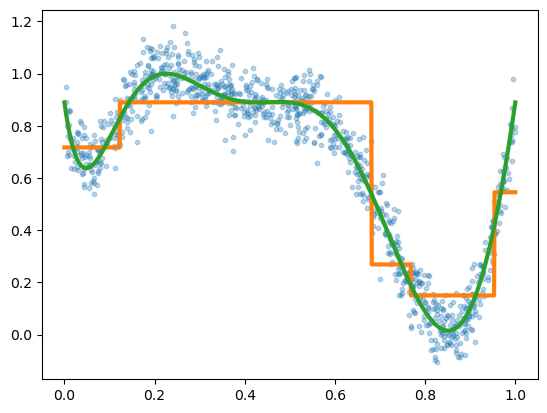

In [86]:
plt.scatter(x_train, y_train, s=10, c="C0", alpha=0.3)
plt.plot(
    x_test,
    model.predict(X_test)
    + model1.predict(X_test)
    + model2.predict(X_test)
    + model3.predict(X_test),
    "C1",
    lw=3,
)
plt.plot(x_test, f(x_test), "C2", lw=3)

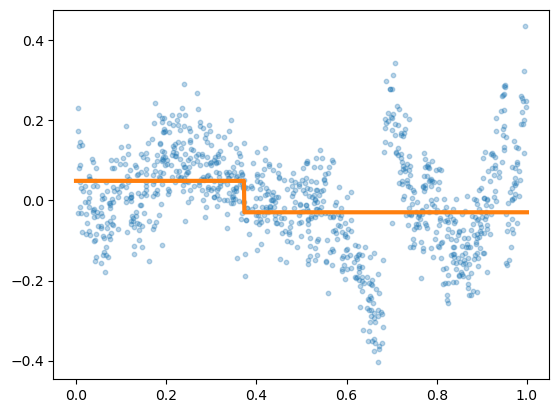

In [87]:
model4 = DecisionTreeRegressor(max_depth=1)
model4.fit(
    X_train,
    y_train
    - model.predict(X_train)
    - model1.predict(X_train)
    - model2.predict(X_train)
    - model3.predict(X_train),
)


plt.scatter(
    x_train,
    y_train
    - model.predict(X_train)
    - model1.predict(X_train)
    - model2.predict(X_train)
    - model3.predict(X_train),
    s=10,
    c="C0",
    alpha=0.3,
)
plt.plot(x_test, model4.predict(X_test), "C1", lw=3)

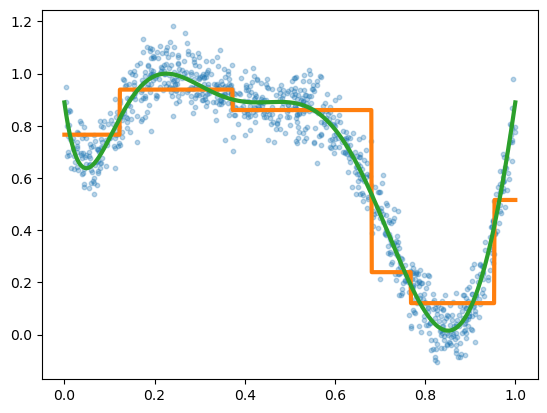

In [88]:
plt.scatter(x_train, y_train, s=10, c="C0", alpha=0.3)
plt.plot(
    x_test,
    model.predict(X_test)
    + model1.predict(X_test)
    + model2.predict(X_test)
    + model3.predict(X_test)
    + model4.predict(X_test),
    "C1",
    lw=3,
)
plt.plot(x_test, f(x_test), "C2", lw=3)

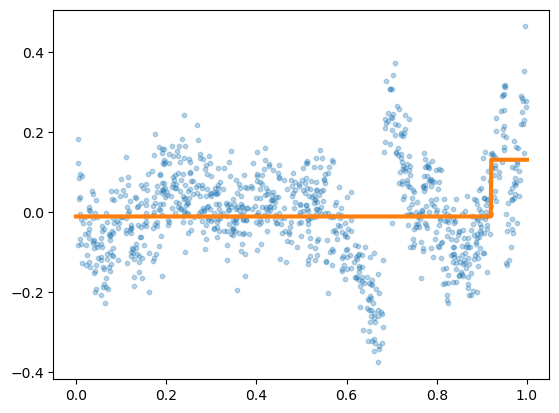

In [89]:
model5 = DecisionTreeRegressor(max_depth=1)
model5.fit(
    X_train,
    y_train
    - model.predict(X_train)
    - model1.predict(X_train)
    - model2.predict(X_train)
    - model3.predict(X_train)
    - model4.predict(X_train),
)


plt.scatter(
    x_train,
    y_train
    - model.predict(X_train)
    - model1.predict(X_train)
    - model2.predict(X_train)
    - model3.predict(X_train)
    - model4.predict(X_train),
    s=10,
    c="C0",
    alpha=0.3,
)
plt.plot(x_test, model5.predict(X_test), "C1", lw=3)

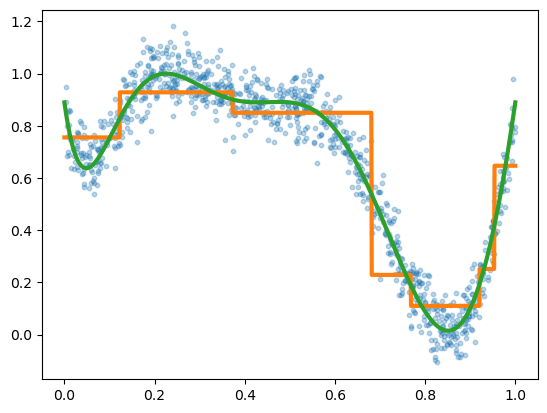

In [90]:
plt.scatter(x_train, y_train, s=10, c="C0", alpha=0.3)
plt.plot(
    x_test,
    model.predict(X_test)
    + model1.predict(X_test)
    + model2.predict(X_test)
    + model3.predict(X_test)
    + model4.predict(X_test)
    + model5.predict(X_test),
    "C1",
    lw=3,
)
plt.plot(x_test, f(x_test), "C2", lw=3)

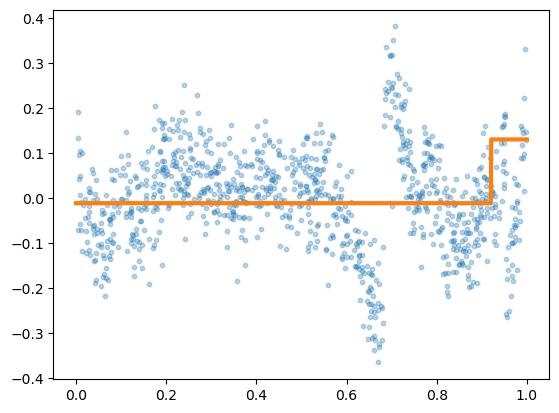

In [91]:
model6 = DecisionTreeRegressor(max_depth=1)
model6.fit(
    X_train,
    y_train
    - model.predict(X_train)
    - model1.predict(X_train)
    - model2.predict(X_train)
    - model3.predict(X_train)
    - model4.predict(X_train),
)


plt.scatter(
    x_train,
    y_train
    - model.predict(X_train)
    - model1.predict(X_train)
    - model2.predict(X_train)
    - model3.predict(X_train)
    - model4.predict(X_train)
    - model5.predict(X_train),
    s=10,
    c="C0",
    alpha=0.3,
)
plt.plot(x_test, model6.predict(X_test), "C1", lw=3)

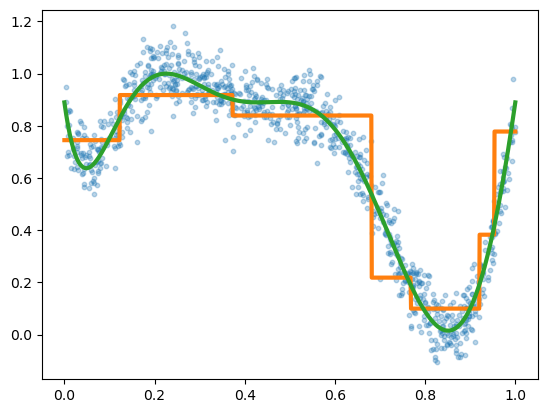

In [92]:
plt.scatter(x_train, y_train, s=10, c="C0", alpha=0.3)
plt.plot(
    x_test,
    model.predict(X_test)
    + model1.predict(X_test)
    + model2.predict(X_test)
    + model3.predict(X_test)
    + model4.predict(X_test)
    + model5.predict(X_test)
    + model6.predict(X_test),
    "C1",
    lw=3,
)
plt.plot(x_test, f(x_test), "C2", lw=3)

In [93]:
r = y_train.copy()
models = []
for i in range(150):
    model = DecisionTreeRegressor(max_depth=1)
    models.append(model)
    model.fit(X_train, r)
    r -= model.predict(X_train)

In [94]:
preds = np.cumsum(np.array([model.predict(X_test) for model in models]), axis=0)

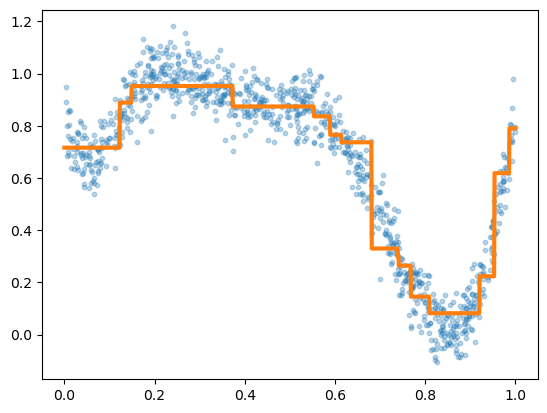

In [95]:
plt.scatter(x_train, y_train, s=10, c="C0", alpha=0.3)
# for i in range(20):
#     plt.plot(x_test, preds[i], "C1", lw=3, alpha=1/(20 - i))
plt.plot(x_test, preds[20], "C1", lw=3)

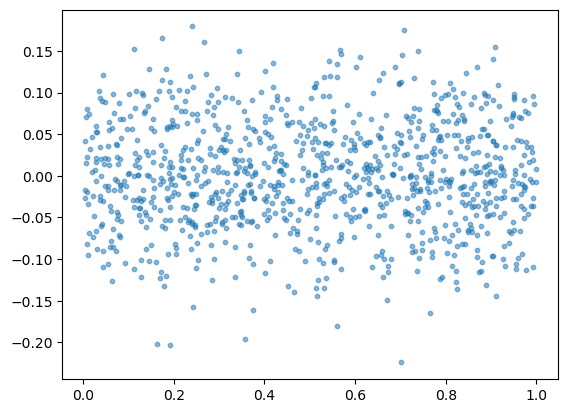

In [96]:
plt.scatter(x_train, r, s=10, c="C0", alpha=0.5)

In [97]:
df = pd.read_csv("data/auto_preprocessed.csv")
df.head()
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [98]:
param_grid = {"min_samples_leaf": [1, 2]}
model = GridSearchCV(
    RandomForestRegressor(n_estimators=500),
    param_grid,
    scoring="neg_mean_squared_error",
    cv=RepeatedKFold(),
)
model.fit(X, y)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=RandomForestRegressor(n_estimators=500),
             param_grid={'min_samples_leaf': [1, 2]},
             scoring='neg_mean_squared_error')

In [99]:
model.best_params_

{'min_samples_leaf': 1}

In [100]:
model.best_score_

-7.534274262553855

In [101]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,1.018619,0.096768,0.022340,0.007340,1,{'min_samples_leaf': 1},-10.758534,-8.216791,-6.375037,-6.878183,...,-9.714255,-4.777013,-9.583006,-6.260938,-6.765638,-7.795082,-6.737488,-7.534274,1.729252,1
1,0.985864,0.035630,0.022247,0.006252,2,{'min_samples_leaf': 2},-10.859419,-8.440938,-6.554392,-6.613693,...,-10.647783,-4.888815,-9.691824,-6.179938,-7.093834,-7.754860,-7.425103,-7.669371,1.761154,2


In [102]:
X_train = x_train.reshape(-1, 1)
X_test = x_test.reshape(-1, 1)

In [103]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
max_depths = [e.tree_.max_depth for e in model.estimators_]
node_counts = [e.tree_.node_count for e in model.estimators_]
n_leaves = [e.tree_.n_leaves for e in model.estimators_]
ic(np.median(max_depths), np.median(node_counts), np.median(n_leaves))

ic| np.median(max_depths): 23.0
    np.median(node_counts): 1265.0
    np.median(n_leaves): 633.0


(23.0, 1265.0, 633.0)

In [104]:
from sklearn.datasets import fetch_california_housing

In [105]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [107]:
from sklearn.ensemble import RandomForestRegressor

model = model = GridSearchCV(
    RandomForestRegressor(n_jobs=-1), param_grid={}, scoring="neg_mean_squared_error"
)
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1), param_grid={},
             scoring='neg_mean_squared_error')

In [108]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = model = GridSearchCV(
    HistGradientBoostingRegressor(max_iter=200),
    param_grid={"learning_rate": [0.01, 0.1, 1.0]},
    scoring="neg_mean_squared_error",
)
model.fit(X_train, y_train)

GridSearchCV(estimator=HistGradientBoostingRegressor(max_iter=200),
             param_grid={'learning_rate': [0.01, 0.1, 1.0]},
             scoring='neg_mean_squared_error')

In [109]:
model.best_score_

-0.20969315477391076

In [110]:
model.best_params_

{'learning_rate': 0.1}